In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16,ResNet50


**1.Carga csv**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 7


In [2]:
file_path = 'C:/Users/andre/Downloads/csv_final_video7.csv'
df = pd.read_csv(file_path)

df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}"
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}"
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}"
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}"
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}"


In [3]:
# Asegurarnos de que la columna 'label' exista
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df[['filename', 'label']].head()

,filename,label
0,surco-rouviere-244.jpg,vesicula
1,surco-rouviere-244.jpg,surco
2,surco-rouviere-244.jpg,segmento4
3,surco-rouviere-326.jpg,vesicula
4,surco-rouviere-326.jpg,surco


In [4]:
# Función para convertir las coordenadas del formato JSON a (x_min, y_min, x_max, y_max)
def convert_to_bounding_box(region_shape_attributes):
    shape_dict = ast.literal_eval(region_shape_attributes)
    x_min = shape_dict['x']
    y_min = shape_dict['y']
    x_max = x_min + shape_dict['width']
    y_max = y_min + shape_dict['height']
    return x_min, y_min, x_max, y_max

In [5]:


# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = zip(*df['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()

,filename,x_min,y_min,x_max,y_max,label
0,surco-rouviere-244.jpg,298,192,634,426,vesicula
1,surco-rouviere-244.jpg,259,367,394,475,surco
2,surco-rouviere-244.jpg,519,55,698,210,segmento4
3,surco-rouviere-326.jpg,298,64,531,470,vesicula
4,surco-rouviere-326.jpg,142,250,312,420,surco


In [6]:
array_filename= df['filename'].unique()

In [7]:
array_filename.shape

(61,)

In [8]:
df.shape

(182, 12)

**Carga csv 2**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 2

In [9]:
file_path2 = './via_export_csv_final.csv'
df2 = pd.read_csv(file_path2)

df2.head()


,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,frame_15090.jpg,115668,{},3,0,"{""name"":""rect"",""x"":476,""y"":138,""width"":153,""he...","{""Region"":""vesicula""}"
1,frame_15090.jpg,115668,{},3,1,"{""name"":""rect"",""x"":338,""y"":277,""width"":132,""he...","{""Region"":""surco""}"
2,frame_15090.jpg,115668,{},3,2,"{""name"":""rect"",""x"":638,""y"":234,""width"":120,""he...","{""Region"":""segmento4""}"
3,frame_15103.jpg,128711,{},3,0,"{""name"":""rect"",""x"":454,""y"":145,""width"":143,""he...","{""Region"":""vesicula""}"
4,frame_15103.jpg,128711,{},3,1,"{""name"":""rect"",""x"":370,""y"":305,""width"":166,""he...","{""Region"":""surco""}"


In [10]:
# Asegurarnos de que la columna 'label' exista
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df2[['filename', 'label']].head()


,filename,label
0,frame_15090.jpg,vesicula
1,frame_15090.jpg,surco
2,frame_15090.jpg,segmento4
3,frame_15103.jpg,vesicula
4,frame_15103.jpg,surco


In [11]:
# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df2['x_min'], df2['y_min'], df2['x_max'], df2['y_max'] = zip(*df2['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df2[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()


,filename,x_min,y_min,x_max,y_max,label
0,frame_15090.jpg,476,138,629,475,vesicula
1,frame_15090.jpg,338,277,470,446,surco
2,frame_15090.jpg,638,234,758,382,segmento4
3,frame_15103.jpg,454,145,597,468,vesicula
4,frame_15103.jpg,370,305,536,439,surco


In [12]:
array_filename2= df2['filename'].unique()
array_filename2.shape

(835,)

In [13]:
df2.shape

(2505, 12)

In [14]:
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}",vesicula,298,192,634,426
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}",surco,259,367,394,475
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}",segmento4,519,55,698,210
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}",vesicula,298,64,531,470
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}",surco,142,250,312,420


In [15]:
merged_df.tail()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
2682,frame_7775.jpg,105868,{},3,1,"{""name"":""rect"",""x"":314,""y"":334,""width"":123,""he...","{""Region"":""surco""}",surco,314,334,437,402
2683,frame_7775.jpg,105868,{},3,2,"{""name"":""rect"",""x"":542,""y"":222,""width"":68,""hei...","{""Region"":""segmento4""}",segmento4,542,222,610,293
2684,frame_7786.jpg,103277,{},3,0,"{""name"":""rect"",""x"":372,""y"":13,""width"":132,""hei...","{""Region"":""vesicula""}",vesicula,372,13,504,325
2685,frame_7786.jpg,103277,{},3,1,"{""name"":""rect"",""x"":292,""y"":321,""width"":127,""he...","{""Region"":""surco""}",surco,292,321,419,407
2686,frame_7786.jpg,103277,{},3,2,"{""name"":""rect"",""x"":540,""y"":240,""width"":74,""hei...","{""Region"":""segmento4""}",segmento4,540,240,614,295


In [16]:
merged_df.shape

(2687, 12)

**Cargar Imágenes**

In [17]:
class_folders = [
        'antes-cirugia-grande',
        'durante-cirugia',
        'despues-cirugia-grande'
]

In [18]:
def ensure_directory_exists(directory):
    """
    Crea el directorio si no existe.
    
    Parámetros:
    -----------
    directory : str
        La ruta del directorio.
    """
    if not os.path.exists(directory):
        os.makedirs(directory)

In [19]:
def get_image_filenames(image_dirs):
    """
    Obtiene los nombres de los archivos de imagen .jpg de múltiples directorios.
    
    Parámetros:
    -----------
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
        
    Retorno:
    --------
    list : Lista de nombres de archivos .jpg.
    """
    image_filenames = []
    for image_dir in image_dirs:
        image_filenames += [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    return image_filenames

**Cargar txt para YOLO**

In [20]:
# Definir el mapeo de las etiquetas
label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}

def convert_bbox_to_yolo_format(image_w, image_h, x_min, y_min, x_max, y_max):
    """
    Convierte las coordenadas del bounding box al formato YOLO (x_centro, y_centro, width, height) normalizado.
    """
    x_center = (x_min + x_max) / 2.0
    y_center = (y_min + y_max) / 2.0
    width = x_max - x_min
    height = y_max - y_min

    # Normalizar
    x_center /= image_w
    y_center /= image_h
    width /= image_w
    height /= image_h

    return x_center, y_center, width, height

In [21]:
def create_yolo_annotations(df, image_dirs, output_dir):
    """
    Crea archivos de anotación en formato YOLO a partir de los datos en el DataFrame.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene las coordenadas y etiquetas de cada imagen.
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
    output_dir : str
        Ruta al directorio donde se guardarán los archivos de anotación.
    """
    # Asegurarse de que el directorio de salida exista
    ensure_directory_exists(output_dir)

    # Obtener los nombres de los archivos de imagen .jpg de los múltiples directorios
    image_filenames = get_image_filenames(image_dirs)
    print("tamaño: ",len(image_filenames))

    # Procesar cada imagen en la lista de archivos
    for name_image in image_filenames:
        # Obtener la ruta completa de la imagen
        image_path = None
        for image_dir in image_dirs:
            possible_path = os.path.join(image_dir, name_image)
            if os.path.exists(possible_path):
                image_path = possible_path
                break

        if image_path is None:
            print(f"Error: No se pudo encontrar la imagen {name_image}")
            continue

        # Leer la imagen
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: No se pudo cargar {image_path}")
            continue

        h, w = image.shape[:2]  # Obtener alto y ancho de la imagen

        # Crear el archivo .txt para cada imagen
        output_path = os.path.join(output_dir, name_image.replace('.jpg', '.txt'))
        with open(output_path, 'w') as f:
            # Filtrar las filas correspondientes a esta imagen en el DataFrame
            df_image = df[df['filename'] == name_image]

            if df_image.empty:
                # Si no hay regiones para la imagen, escribir un texto vacío (sin regiones)
                f.write("")
            else:
                # Procesar cada fila en el dataframe para esta imagen
                for _, row in df_image.iterrows():
                    label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}
                    label = label_map.get(row['label'], -1)  # Convertir la etiqueta al índice
                    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']

                    # Convertir el bounding box al formato YOLO
                    x_center, y_center, width, height = convert_bbox_to_yolo_format(w, h, x_min, y_min, x_max, y_max)

                    # Escribir en el archivo de salida
                    f.write(f"{label} {x_center} {y_center} {width} {height}\n")


In [22]:
# Ruta al directorio de imágenes y al directorio de salida de las anotaciones
base_dir = './'
output_dir = './images_txt/'

# Llamar la función para generar las anotaciones
create_yolo_annotations(merged_df, class_folders, output_dir)

tamaño:  2984


**Procesamiento de la imágenes**

Se redimensionan a un tamaño de 224x224,se normalizan y adicionamente se obtienen las coordenadas de cada región de la imagen

In [23]:
def read_imageResize_with_labels(df, image_dirs, target_size=(224, 224)):
    """
    Lee imágenes de múltiples directorios, las redimensiona a 224x224 píxeles y las etiqueta según 
    los valores en el DataFrame. Las imágenes son procesadas en RGB.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene la información de las imágenes y coordenadas.
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
    target_size : tuple, opcional
        Tamaño al que se redimensionarán las imágenes. Por defecto es (224, 224).

    Retorno:
    --------
    tuple: 
        - np.array: Un array de NumPy con las imágenes redimensionadas.
        - dict: Un diccionario con los bounding boxes y las etiquetas correspondientes a las imágenes.
    """
    images_now = []
    bbox_targets = []
    class_targets = []

    # Obtener todos los nombres de archivo de las imágenes de los directorios especificados
    image_filenames = get_image_filenames(image_dirs)

    # Procesar cada imagen en la lista de archivos
    for name_image in image_filenames:
        # Obtener la ruta completa de la imagen
        image_path = None
        for image_dir in image_dirs:
            possible_path = os.path.join(image_dir, name_image)
            if os.path.exists(possible_path):
                image_path = possible_path
                break

        if image_path is None:
            print(f"Error: No se pudo encontrar la imagen {name_image}")
            continue

        # Leer y procesar la imagen
        image = cv2.imread(image_path)
        if image is None:
            print(f"Advertencia: No se pudo leer la imagen {image_path}")
            continue

        height, width = image.shape[:2]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
        image = image / 255.0

        # Buscar en el DataFrame las etiquetas correspondientes a esta imagen
        df_image = df[df['filename'] == name_image]

        # Verificar si hay regiones en la imagen
        if df_image.empty:
            # Imagen sin regiones: asignar etiquetas de una nueva clase "sin regiones" (ejemplo: clase 3)
            bboxes = [[0, 0, 0, 0] for _ in range(3)]
            labels = [3 for _ in range(3)]  
        else:
            # Imagen con regiones: procesar normalmente
            bboxes = []
            labels = []
            for _, row in df_image.iterrows():
                label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}
                label = label_map.get(row['label'], 3)  # Clase especial "sin regiones" si no es válida
                x_scale = target_size[0] / width
                y_scale = target_size[1] / height

                x_min = row['x_min'] * x_scale
                y_min = row['y_min'] * y_scale
                x_max = row['x_max'] * x_scale
                y_max = row['y_max'] * y_scale

                bbox = [x_min, y_min, x_max, y_max]
                bboxes.append(bbox)
                labels.append(label)

            # Asegurarse de que cada imagen tenga 3 regiones, si no, rellenar con valores vacíos
            while len(bboxes) < 3:
                bboxes.append([0, 0, 0, 0])  # Cuadro delimitador vacío
                labels.append(3)  # Asignar clase especial "sin regiones"

        images_now.append(image)
        bbox_targets.append(bboxes)
        class_targets.append(tf.keras.utils.to_categorical(labels, num_classes=4))  # 4 clases ahora (0, 1, 2, 3)

    images_now = np.array(images_now)
    bbox_targets = np.array(bbox_targets)
    class_targets = np.array(class_targets)

    return images_now, {"bounding_box": bbox_targets, "class_label": class_targets}


In [24]:
# Llamar a la función con la ruta adecuada
images, targets = read_imageResize_with_labels(merged_df,image_dirs=class_folders)



In [25]:
# Verificar el tamaño de los arrays resultantes
print(f"Número de imágenes: {images.shape[0]}")
print(f"Tamaño de cada imagen: {images.shape[1:]}")

# Verificar las etiquetas
primera_llave = next(iter(targets))
primer_valor = targets[primera_llave]


Número de imágenes: 2984
Tamaño de cada imagen: (224, 224, 3)


In [26]:
print(type(images[0]))

<class 'numpy.ndarray'>


In [27]:
def inspect_random_targets(targets, num_items=5):
    """
    Inspecciona 'num_items' elementos aleatorios de targets para visualizar 
    los bounding boxes y las etiquetas de clase.
    
    Parámetros:
    ----------
    targets : dict
        Diccionario que contiene 'bounding_box' y 'class_label'.
    num_items : int, opcional
        Número de elementos a visualizar.
    """
    bounding_boxes = targets['bounding_box']
    class_labels = targets['class_label']
    

    random_indices = np.random.choice(len(bounding_boxes), num_items, replace=False)
    
    for i in random_indices:
        print(f"--- Imagen {i+1} ---")
        
        print(f"Bounding Boxes (imagen {i+1}):")
        for bbox in bounding_boxes[i]:
            print(f"x_min: {bbox[0]}, y_min: {bbox[1]}, x_max: {bbox[2]}, y_max: {bbox[3]}")
        
        print(f"Class Labels (imagen {i+1}):")
        for label in class_labels[i]:
            label_index = np.argmax(label)
            # Ajusta el nombre para la clase especial 3
            if label_index == 3:
                label_name = 'sin regiones'
            else:
                label_name = 'vesicula' if label_index == 0 else ('surco' if label_index == 1 else 'segmento4')
                
            print(f"Label: {label_index} ({label_name})")
        
        print("\n")


In [28]:

inspect_random_targets(targets, num_items=3)

--- Imagen 283 ---
Bounding Boxes (imagen 283):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
Class Labels (imagen 283):
Label: 3 (sin regiones)
Label: 3 (sin regiones)
Label: 3 (sin regiones)


--- Imagen 340 ---
Bounding Boxes (imagen 340):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
Class Labels (imagen 340):
Label: 3 (sin regiones)
Label: 3 (sin regiones)
Label: 3 (sin regiones)


--- Imagen 1537 ---
Bounding Boxes (imagen 1537):
x_min: 100.72131147540983, y_min: 4.666666666666667, x_max: 160.0, y_max: 119.93333333333334
x_min: 115.9344262295082, y_min: 113.86666666666667, x_max: 145.5737704918033, y_max: 155.4
x_min: 153.44262295081967, y_min: 71.86666666666667, x_max: 179.9344262295082, y_max: 104.53333333333333
Class Labels (imagen 1537):
Label: 0 (vesicula)
Label: 1 (surco)
Label: 2 (segme

In [29]:
import os
destination_directory = './durante-cirugia/' 
# Lista de imágenes en el directorio
images_in_directory = set(os.listdir(destination_directory))

# Lista de imágenes en el DataFrame
images_in_dataframe = set(merged_df['filename'].unique())

# Imágenes que están en el directorio pero no en el DataFrame
missing_in_dataframe = images_in_directory - images_in_dataframe

# Imágenes que están en el DataFrame pero no en el directorio
missing_in_directory = images_in_dataframe - images_in_directory

# Mostrar los resultados
print(f"Imágenes en el directorio pero no en el DataFrame: {len(missing_in_dataframe)}")
#print(missing_in_dataframe)

print(f"Imágenes en el DataFrame pero no en el directorio: {len(missing_in_directory)}")
#print(missing_in_directory)


Imágenes en el directorio pero no en el DataFrame: 84
Imágenes en el DataFrame pero no en el directorio: 0


In [30]:
print(images.shape)

(2984, 224, 224, 3)


In [31]:
def visualize_bounding_boxes(images, targets, num_images=5, columns=2):
    """
    Visualiza un número determinado de imágenes con sus correspondientes cuadros delimitadores
    y etiquetas de clase. No dibuja cuadros ni etiquetas si la clase es inválida (-1 o 3).

    Parámetros:
    -----------
    images : numpy.ndarray
        Array de imágenes.
    targets : dict
        Diccionario que contiene los cuadros delimitadores ('bounding_box') y etiquetas ('class_label').
    num_images : int, opcional
        Número de imágenes a visualizar.
    columns : int, opcional
        Número de columnas en la visualización de subplots.
    """

    
    random_indices = np.random.choice(len(images), num_images, replace=False)

    # Definir el número de filas en función del número de imágenes y columnas
    rows = (num_images + columns - 1) // columns

    # Crear subplots
    fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
    axes = axes.flatten()  

    for idx, i in enumerate(random_indices):
        ax = axes[idx]
        ax.imshow(images[i])
        bbox_list = targets['bounding_box'][i]
        class_list = targets['class_label'][i]

        for bbox, class_label in zip(bbox_list, class_list):
            label = np.argmax(class_label)

            # Si la etiqueta es -1 o 3 (sin regiones), no dibujar cuadros
            if label == -1 or label == 3:
                continue  


            color = 'red' if label == 0 else ('blue' if label == 1 else 'green')
            label_name = 'vesicula' if label == 0 else ('surco' if label == 1 else 'segmento4')


            ax.add_patch(plt.Rectangle(
                (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
                edgecolor=color, facecolor='none', linewidth=2))

            # Añadir el texto de la etiqueta
            ax.text(bbox[0], bbox[1] - 10, f"{label_name}", color=color, fontsize=12,
                    bbox=dict(facecolor='yellow', alpha=0.5))
        
        ax.axis('off')  

    # Eliminar los subplots vacíos si el número de imágenes es menor que los subplots creados
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()



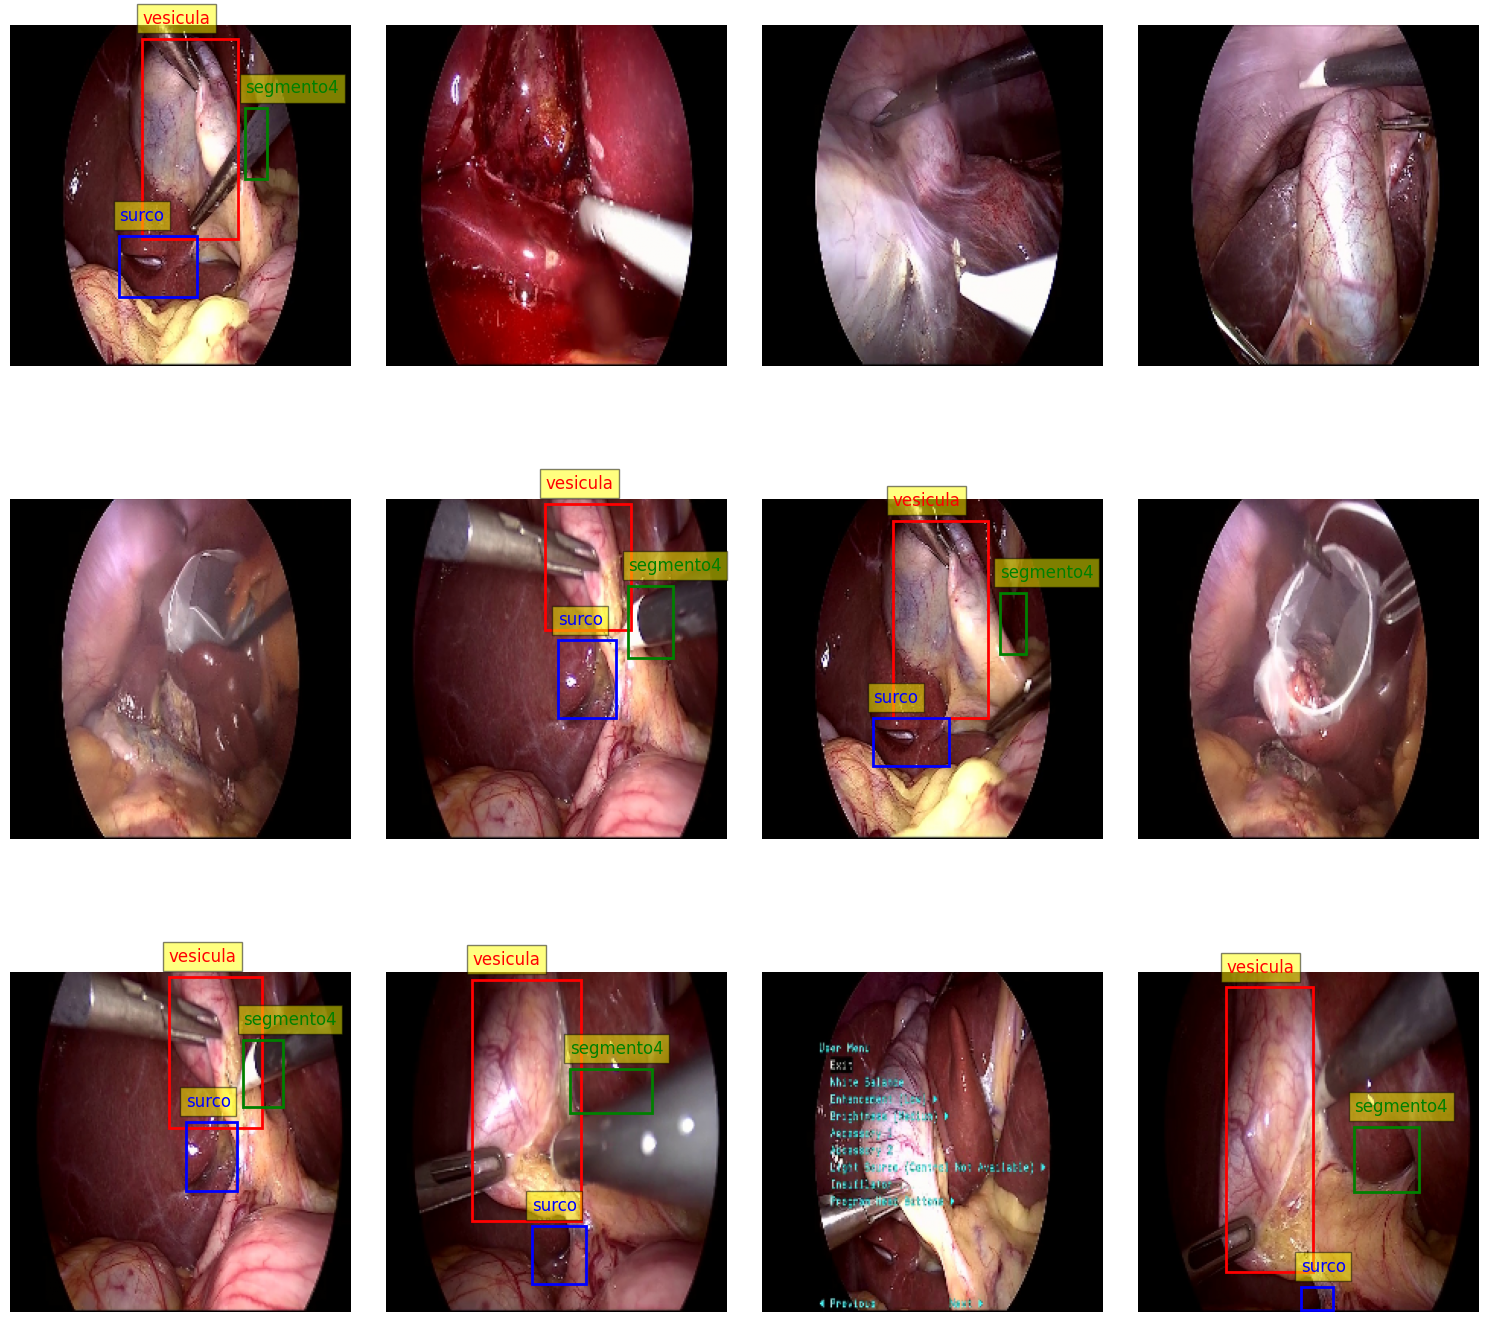

In [32]:
visualize_bounding_boxes(images, targets, num_images=12, columns=4)

**División train-test**

In [33]:
def copy_images_and_txt(image_list, output_dir, image_dirs, txt_dir):
    """
    Copia las imágenes y sus correspondientes archivos .txt a un directorio de destino.
    
    Parámetros:
    -----------
    image_list : list
        Lista de nombres de archivos de imagen.
    output_dir : str
        Directorio de salida para las imágenes y archivos .txt.
    image_dirs : list
        Lista de rutas de directorios donde se encuentran las imágenes.
    txt_dir : str
        Directorio que contiene los archivos .txt con las etiquetas.
    """
    for image in image_list:
        # Buscar en qué directorio está la imagen
        for image_dir in image_dirs:
            image_path = os.path.join(image_dir, image)
            if os.path.exists(image_path):
                # Copiar la imagen
                shutil.copy(image_path, os.path.join(output_dir, image))
                
                # Copiar el archivo .txt correspondiente
                txt_filename = image.replace('.jpg', '.txt')
                txt_path = os.path.join(txt_dir, txt_filename)
                
                if os.path.exists(txt_path):
                    shutil.copy(txt_path, os.path.join(output_dir, txt_filename))
                else:
                    print(f"Advertencia: No se encontró el archivo {txt_filename} para la imagen {image}.")
                break

In [34]:
def split_data(image_filenames, val_size=0.2):
    """
    Divide los datos en conjuntos de entrenamiento y validación.
    
    Parámetros:
    -----------
    image_filenames : list
        Lista de nombres de archivos de imagen.
    val_size : float, opcional
        Proporción del conjunto de validación. Por defecto es 0.2.
        
    Retorno:
    --------
    tuple : Listas de imágenes divididas en entrenamiento y validación.
    """
    return train_test_split(image_filenames, test_size=val_size, random_state=42)

In [35]:
def split_data_multiple_dirs(image_dirs, txt_dir, output_train_dir, output_val_dir, val_size=0.2):
    """
    Divide los datos en entrenamiento y validación, copiando las imágenes y sus archivos .txt 
    correspondientes desde varios directorios.
    
    Parámetros:
    -----------
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
    txt_dir : str
        Directorio que contiene los archivos .txt con las etiquetas.
    output_train_dir : str
        Directorio de salida para las imágenes y etiquetas de entrenamiento.
    output_val_dir : str
        Directorio de salida para las imágenes y etiquetas de validación.
    val_size : float, opcional
        Proporción del conjunto de validación. Por defecto es 0.2.
    """
    
    ensure_directory_exists(output_train_dir)
    ensure_directory_exists(output_val_dir)
    
    
    image_filenames = get_image_filenames(image_dirs)
    
    
    train_images, val_images = split_data(image_filenames, val_size)
    
    
    copy_images_and_txt(train_images, output_train_dir, image_dirs, txt_dir)
    
 
    copy_images_and_txt(val_images, output_val_dir, image_dirs, txt_dir)
    
    print(f"Datos divididos: {len(train_images)} para entrenamiento y {len(val_images)} para validación.")




In [38]:

image_dirs = ['./antes-cirugia-grande', './durante-cirugia', './despues-cirugia-grande']

# Directorio de archivos .txt
txt_dir = './images_txt/'

# Directorios de salida para entrenamiento y validación
output_train_dir = './train/'
output_val_dir = './val/'

# Dividir los datos
split_data_multiple_dirs(image_dirs, txt_dir, output_train_dir, output_val_dir)

Datos divididos: 2387 para entrenamiento y 597 para validación.


**Resumen del modelo entrenado de Yolo-v5**

In [1]:

import torch

model_path = 'results/entrenamiento/weights/best.pt'  # Ajusta el camino a la carpeta donde esté 'best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)

# Mostrar el resumen del modelo
model.model  # Esto te mostrará la arquitectura del modelo
print("*********************Arquitectura del modelo**************\n",model.model)  # Imprime el resumen




Using cache found in C:\Users\andre/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-14 Python-3.12.5 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


*********************Arquitectura del modelo**************
 DetectMultiBackend(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act